In [304]:
import pandas as pd 

import numpy as np
import matplotlib.pyplot as plt


In [207]:
  
# making data frame from csv file 
data = pd.read_csv("reddits.csv") 
  
# sorting
#data.sort_values("First Name", inplace = True) 

#length before adding row 
length1 = len(data) 



data['Text'] = data[['Title', 'SelfText']].agg('-'.join, axis=1)


data.head()

,Index,Keyword,Title,Score,Comments,URL,Domain,Permalink,ID,Subreddit,CreatedDate,SelfText,Text
0,1,Patroit,If you could choose one celebrity to instantly...,3,16,https://www.reddit.com/r/AskReddit/comments/an...,self.AskReddit,/r/AskReddit/comments/ando4d/if_you_could_choo...,ando4d,AskReddit,02-05-2019,"""""",If you could choose one celebrity to instantly...
1,2,Panoply security,"Does our current fixation on nostalgia, partic...",10,22,https://www.reddit.com/r/AskReddit/comments/js...,self.AskReddit,/r/AskReddit/comments/js0v3/does_our_current_f...,js0v3,AskReddit,08-24-2011,"""I admit it. I get giddy over cartoons like Do...","Does our current fixation on nostalgia, partic..."
2,3,Cybersecurity Competition,What was an award you got that you didn’t dese...,1,6,https://www.reddit.com/r/AskReddit/comments/ai...,self.AskReddit,/r/AskReddit/comments/aizzlg/what_was_an_award...,aizzlg,AskReddit,01-23-2019,"""""",What was an award you got that you didn’t dese...
3,4,ethical hacking,What is a good expansion from ethical hacking?,0,0,https://www.reddit.com/r/AskReddit/comments/fq...,self.AskReddit,/r/AskReddit/comments/fq6lxi/what_is_a_good_ex...,fq6lxi,AskReddit,03-28-2020,"""""","What is a good expansion from ethical hacking?-"""""
4,5,ethical hacking,As a beginner of ethical hacking what do you r...,1,4,https://www.reddit.com/r/AskReddit/comments/ct...,self.AskReddit,/r/AskReddit/comments/ctocaa/as_a_beginner_of_...,ctocaa,AskReddit,08-22-2019,"""""",As a beginner of ethical hacking what do you r...


In [208]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3654 entries, 0 to 3653
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Index        3654 non-null   int64 
 1   Keyword      3654 non-null   object
 2   Title        3654 non-null   object
 3   Score        3654 non-null   int64 
 4   Comments     3654 non-null   int64 
 5   URL          3654 non-null   object
 6   Domain       3654 non-null   object
 7   Permalink    3654 non-null   object
 8   ID           3654 non-null   object
 9   Subreddit    3654 non-null   object
 10  CreatedDate  3654 non-null   object
 11  SelfText     3654 non-null   object
 12  Text         3654 non-null   object
dtypes: int64(3), object(10)
memory usage: 371.2+ KB


(3654, 13)

In [209]:
data = data.loc[(data != "").all(axis=1)]
data.shape



/Users/czhong/anaconda3/envs/textmining/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


(3654, 13)

In [210]:
data.columns

Index(['Index', 'Keyword', 'Title', 'Score', 'Comments', 'URL', 'Domain',
       'Permalink', 'ID', 'Subreddit', 'CreatedDate', 'SelfText', 'Text'],
      dtype='object')

In [211]:
# dropping ALL duplicte values 
data.drop_duplicates(subset=['Subreddit','Text'], keep='first', inplace=True) 

  
# displaying data 
length2 = len(data)


print('The length of data before removing duplicates: ', length1, '\nThe length of data after removing duplicates: ', length2)

The length of data before removing duplicates:  3654 
The length of data after removing duplicates:  3190


In [362]:
data['Year'] = pd.DatetimeIndex(data['CreatedDate']).year
data['Month'] = pd.DatetimeIndex(data['CreatedDate']).month

data.head()


,Index,Keyword,Title,Score,Comments,URL,Domain,Permalink,ID,Subreddit,CreatedDate,SelfText,Text,Year,Month
2861,2862,ethical hacking,Security Researchers Embarrassed After Success...,26,9,http://cyberinsecure.com/security-researchers-...,cyberinsecure.com,/r/netsec/comments/6wchn/security_researchers_...,6wchn,netsec,2008-08-15,"""""",Security Researchers Embarrassed After Success...,2008,8
3488,3489,ethical hacking,Ethical hacking essential to Android/G1 success,3,0,http://www.infoworld.com/article/08/09/23/Andr...,infoworld.com,/r/technology/comments/734or/ethical_hacking_e...,734or,technology,2008-09-24,"""""",Ethical hacking essential to Android/G1 succes...,2008,9
3487,3488,ethical hacking,DIY Career in Ethical Hacking,1,0,http://www.ethicalhacker.net/content/view/201/1/,ethicalhacker.net,/r/technology/comments/75s83/diy_career_in_eth...,75s83,technology,2008-10-08,"""""","DIY Career in Ethical Hacking-""""",2008,10
3491,3492,ethical hacking,"Ethical (oh, really) hacking course launched",7,5,http://www.guardian.co.uk/technology/2008/dec/...,guardian.co.uk,/r/technology/comments/7k2nt/ethical_oh_really...,7k2nt,technology,2008-12-17,"""""","Ethical (oh, really) hacking course launched-""""",2008,12
2852,2853,ethical hacking,Ethical hacking: the next generation security ...,0,0,http://blogs.zdnet.com/igeneration/?p=826,blogs.zdnet.com,/r/netsec/comments/7rzgj/ethical_hacking_the_n...,7rzgj,netsec,2009-01-24,"""""",Ethical hacking: the next generation security ...,2009,1


In [364]:
data['Keyword'].unique()

array(['ethical hacking', 'Hacking competition', 'CTF hacking',
       'Cybersecurity Competition', 'US Cyber Challenge', 'CSAW CTF',
       'Patroit', 'Panoply security', 'CSAW Cybersecurity',
       'CSAW Capture the Flag',
       'National Collegiate Cyber Defense Competition',
       'CSAW Cyber Security', 'Panoply cybersecurity', 'NCL Competition',
       'Mitre CTF', 'nationalcyberleague', 'National Cyber League',
       'Cybersecurity CTF', 'NCL Cyber Security', 'CPTC competition',
       'NCL Cybersecurity', 'NCL CTF'], dtype=object)

In [284]:


data['CreatedDate'] =pd.to_datetime(data['CreatedDate'])

data = data.sort_values(by=['CreatedDate' ])
data['CreatedDate']



2861   2008-08-15
3488   2008-09-24
3487   2008-10-08
3491   2008-12-17
2852   2009-01-24
          ...    
650    2020-06-25
3121   2020-06-25
998    2020-06-25
3076   2020-06-25
2708   2020-06-25
Name: CreatedDate, Length: 3190, dtype: datetime64[ns]

In [285]:

df_00 = data.groupby('CreatedDate').agg('count')
df_00

df_00 = df_00.reset_index()
df_00

,CreatedDate,Index,Keyword,Title,Score,Comments,URL,Domain,Permalink,ID,Subreddit,SelfText,Text,Year,Month
0,2008-08-15,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,2008-09-24,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,2008-10-08,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,2008-12-17,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,2009-01-24,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1579,2020-06-21,4,4,4,4,4,4,4,4,4,4,4,4,4,4
1580,2020-06-22,6,6,6,6,6,6,6,6,6,6,6,6,6,6
1581,2020-06-23,3,3,3,3,3,3,3,3,3,3,3,3,3,3
1582,2020-06-24,6,6,6,6,6,6,6,6,6,6,6,6,6,6


In [343]:
df_0 = data.groupby(['Year','Month'])
df_0 = df_0.agg('count')
df_0

df_0 = df_0.reset_index()
df_0

df_0['Month'] = df_0.Month.map("{:02}".format)
df_0


,Year,Month,Index,Keyword,Title,Score,Comments,URL,Domain,Permalink,ID,Subreddit,CreatedDate,SelfText,Text
0,2008,08,1,1,1,1,1,1,1,1,1,1,1,1,1
1,2008,09,1,1,1,1,1,1,1,1,1,1,1,1,1
2,2008,10,1,1,1,1,1,1,1,1,1,1,1,1,1
3,2008,12,1,1,1,1,1,1,1,1,1,1,1,1,1
4,2009,01,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,2020,02,102,102,102,102,102,102,102,102,102,102,102,102,102
128,2020,03,112,112,112,112,112,112,112,112,112,112,112,112,112
129,2020,04,131,131,131,131,131,131,131,131,131,131,131,131,131
130,2020,05,121,121,121,121,121,121,121,121,121,121,121,121,121


In [344]:

df_0['Time'] = df_0['Year'].map(str) + '-' + df_0['Month'].map(str)

df_0


,Year,Month,Index,Keyword,Title,Score,Comments,URL,Domain,Permalink,ID,Subreddit,CreatedDate,SelfText,Text,Time
0,2008,08,1,1,1,1,1,1,1,1,1,1,1,1,1,2008-08
1,2008,09,1,1,1,1,1,1,1,1,1,1,1,1,1,2008-09
2,2008,10,1,1,1,1,1,1,1,1,1,1,1,1,1,2008-10
3,2008,12,1,1,1,1,1,1,1,1,1,1,1,1,1,2008-12
4,2009,01,1,1,1,1,1,1,1,1,1,1,1,1,1,2009-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,2020,02,102,102,102,102,102,102,102,102,102,102,102,102,102,2020-02
128,2020,03,112,112,112,112,112,112,112,112,112,112,112,112,112,2020-03
129,2020,04,131,131,131,131,131,131,131,131,131,131,131,131,131,2020-04
130,2020,05,121,121,121,121,121,121,121,121,121,121,121,121,121,2020-05


In [345]:
num_total = np.array(df_0['Index'])
print(num_total) 

[  1   1   1   1   1   1   1   1   1   2   1   1   2   2   2   1   1   3
   3   1   2   2   2   4   2   2   5   4   2   5   6   4   5   3   3   3
   3   4   5   6   9   7   3   4   5   8   6   6   2   7  20   7  14  13
   8   7   7  12  10  15  19  12  18  18  14  11   5   8  15   6  19  19
  22  13  19  21  21  14  18  14  17  18  16  20  35  39  24  33  19  22
  20  18  34  24  28  26  26  33  38  45  36  27  38  46  37  48  43  42
  57  43  47  64  32  59  49  58  48  57  57  73  72  78  79  67  60 106
  86 102 112 131 121 104]


In [346]:
year_month = np.array(df_0['Time'])
year_month

array(['2008-08', '2008-09', '2008-10', '2008-12', '2009-01', '2009-02',
       '2009-03', '2009-04', '2009-07', '2009-08', '2009-10', '2009-11',
       '2009-12', '2010-01', '2010-04', '2010-05', '2010-07', '2010-09',
       '2010-10', '2010-11', '2011-01', '2011-02', '2011-03', '2011-04',
       '2011-05', '2011-07', '2011-08', '2011-09', '2011-10', '2011-11',
       '2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06',
       '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12',
       '2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06',
       '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12',
       '2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06',
       '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12',
       '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06',
       '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
       '2016-01', '2016-02', '2016-03', '2016-04', 

In [347]:
#data.index = data['CreatedDate']
#data.index
df_1 = data.groupby(['Year','Month','Subreddit'])
df_1 = df_1.agg('count')
df_1

df_1 = df_1.reset_index()
df_1

,Year,Month,Subreddit,Index,Keyword,Title,Score,Comments,URL,Domain,Permalink,ID,CreatedDate,SelfText,Text
0,2008,8,netsec,1,1,1,1,1,1,1,1,1,1,1,1
1,2008,9,technology,1,1,1,1,1,1,1,1,1,1,1,1
2,2008,10,technology,1,1,1,1,1,1,1,1,1,1,1,1
3,2008,12,technology,1,1,1,1,1,1,1,1,1,1,1,1
4,2009,1,netsec,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615,2020,6,netsecstudents,1,1,1,1,1,1,1,1,1,1,1,1
1616,2020,6,networking,1,1,1,1,1,1,1,1,1,1,1,1
1617,2020,6,nyu,1,1,1,1,1,1,1,1,1,1,1,1
1618,2020,6,oscp,6,6,6,6,6,6,6,6,6,6,6,6


In [348]:
df_1['Month'] = df_1.Month.map("{:02}".format)
df_1

,Year,Month,Subreddit,Index,Keyword,Title,Score,Comments,URL,Domain,Permalink,ID,CreatedDate,SelfText,Text
0,2008,08,netsec,1,1,1,1,1,1,1,1,1,1,1,1
1,2008,09,technology,1,1,1,1,1,1,1,1,1,1,1,1
2,2008,10,technology,1,1,1,1,1,1,1,1,1,1,1,1
3,2008,12,technology,1,1,1,1,1,1,1,1,1,1,1,1
4,2009,01,netsec,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615,2020,06,netsecstudents,1,1,1,1,1,1,1,1,1,1,1,1
1616,2020,06,networking,1,1,1,1,1,1,1,1,1,1,1,1
1617,2020,06,nyu,1,1,1,1,1,1,1,1,1,1,1,1
1618,2020,06,oscp,6,6,6,6,6,6,6,6,6,6,6,6


In [349]:
df_1['Time'] = df_1['Year'].map(str) + '-' +  df_1['Month'].map(str)

df_1

,Year,Month,Subreddit,Index,Keyword,Title,Score,Comments,URL,Domain,Permalink,ID,CreatedDate,SelfText,Text,Time
0,2008,08,netsec,1,1,1,1,1,1,1,1,1,1,1,1,2008-08
1,2008,09,technology,1,1,1,1,1,1,1,1,1,1,1,1,2008-09
2,2008,10,technology,1,1,1,1,1,1,1,1,1,1,1,1,2008-10
3,2008,12,technology,1,1,1,1,1,1,1,1,1,1,1,1,2008-12
4,2009,01,netsec,1,1,1,1,1,1,1,1,1,1,1,1,2009-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615,2020,06,netsecstudents,1,1,1,1,1,1,1,1,1,1,1,1,2020-06
1616,2020,06,networking,1,1,1,1,1,1,1,1,1,1,1,1,2020-06
1617,2020,06,nyu,1,1,1,1,1,1,1,1,1,1,1,1,2020-06
1618,2020,06,oscp,6,6,6,6,6,6,6,6,6,6,6,6,2020-06


In [350]:
df_2 = df_1.groupby(['Time']).agg('count')
df_2 = df_2.reset_index()

df_2 = df_2['Subreddit']
df_2

0       1
1       1
2       1
3       1
4       1
       ..
127    33
128    37
129    38
130    34
131    32
Name: Subreddit, Length: 132, dtype: int64

In [351]:
num_subreddits = np.array(df_2)
print(num_subreddits) 

[ 1  1  1  1  1  1  1  1  1  2  1  1  2  2  1  1  1  2  2  1  2  2  2  4
  2  2  4  4  2  4  6  3  4  3  3  3  2  2  5  4  6  5  3  4  5  4  6  5
  1  5 11  6  9  9  7  6  6  8  7 14 13 11  9 10 10  7  5  6 11  6 11 12
 16 11 13 15 14  8 11 12 14 14 14 13 24 17 16 18 13 17 16 15 22 15 18 14
 20 21 23 27 21 17 17 18 22 23 27 20 25 19 24 28 21 29 24 33 26 27 27 31
 28 30 24 30 19 25 34 33 37 38 34 32]


In [356]:
df_merged = pd.DataFrame({'Time': year_month, 'Total Num':num_total, 'Subreddit Num':num_subreddits})

df_merged

,Time,Total Num,Subreddit Num
0,2008-08,1,1
1,2008-09,1,1
2,2008-10,1,1
3,2008-12,1,1
4,2009-01,1,1
...,...,...,...
127,2020-02,102,33
128,2020-03,112,37
129,2020-04,131,38
130,2020-05,121,34


/Users/czhong/anaconda3/envs/textmining/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


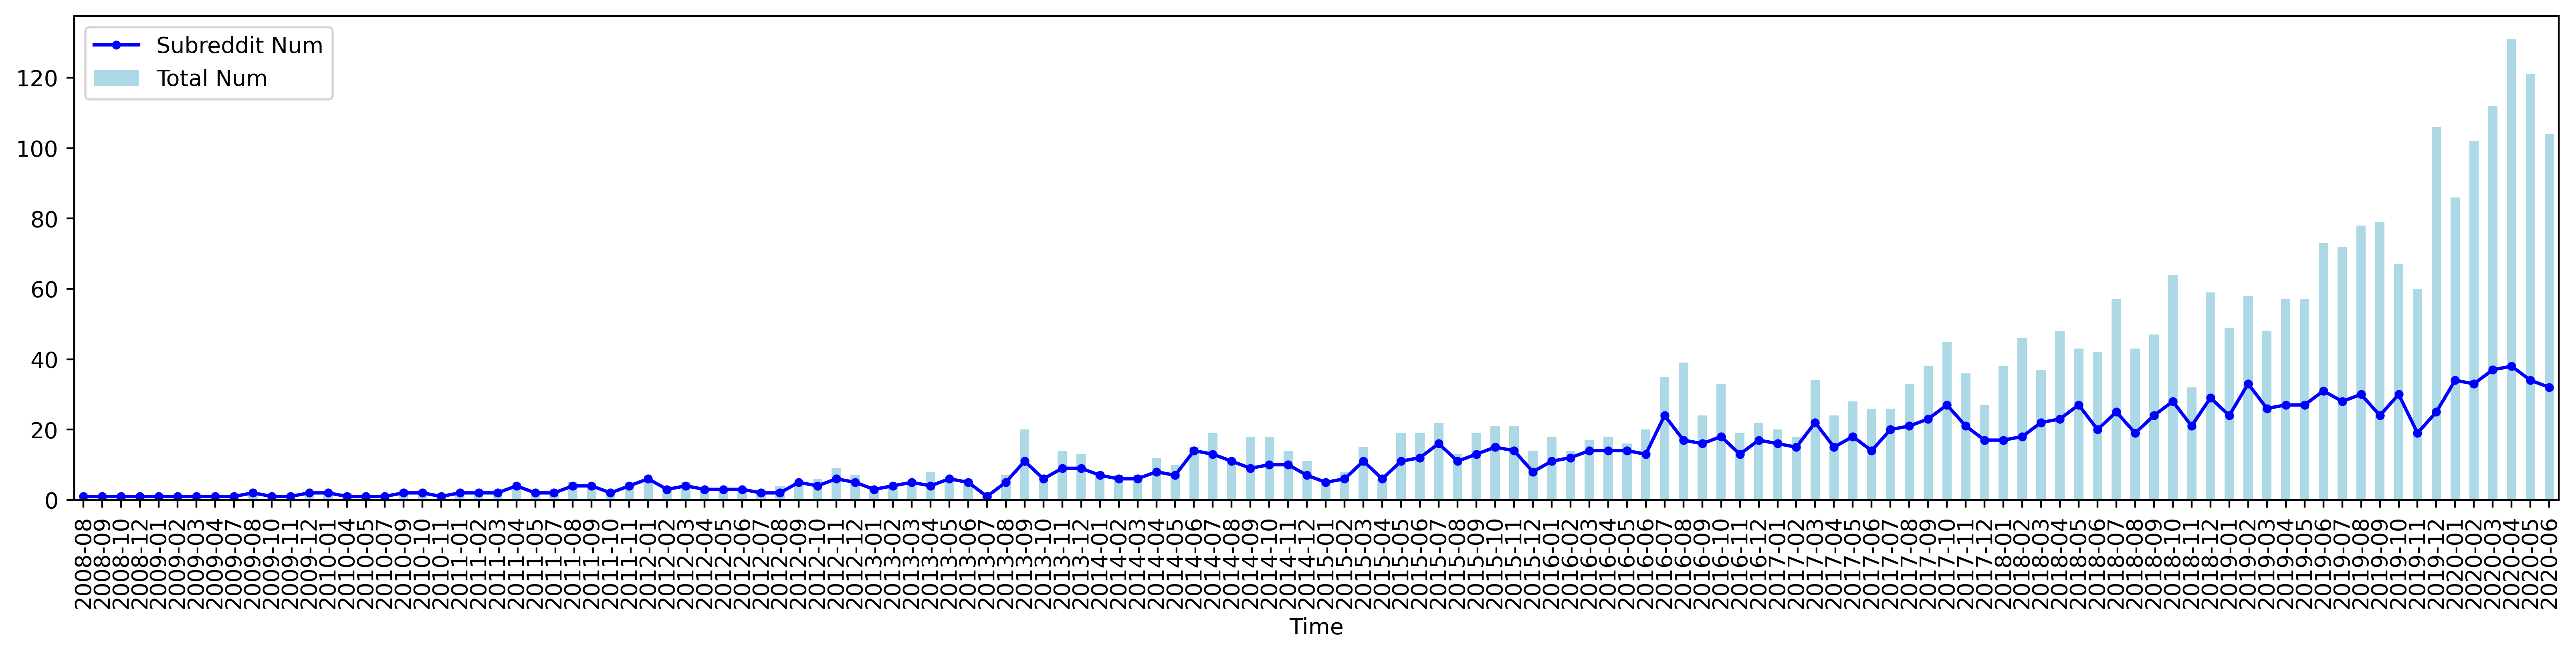

In [361]:
from matplotlib import dates as mpl_dates


formatter = mpl_dates.DateFormatter("%Y-%m")


fig, ax = plt.subplots(figsize=(20,4))
ax.xaxis.set_major_formatter(formatter)


df_merged[['Time', 'Subreddit Num']].plot(x='Time', linestyle='-', marker='.', color='blue', ax=ax)

df_merged[['Time', 'Total Num']].plot(x='Time', kind='bar', color='lightblue', ax=ax)

locator = mpl_dates.DayLocator()
ax.xaxis.set_major_locator(locator)

plt.savefig('counts.png')

plt.show()




# Explore the features

<AxesSubplot:>

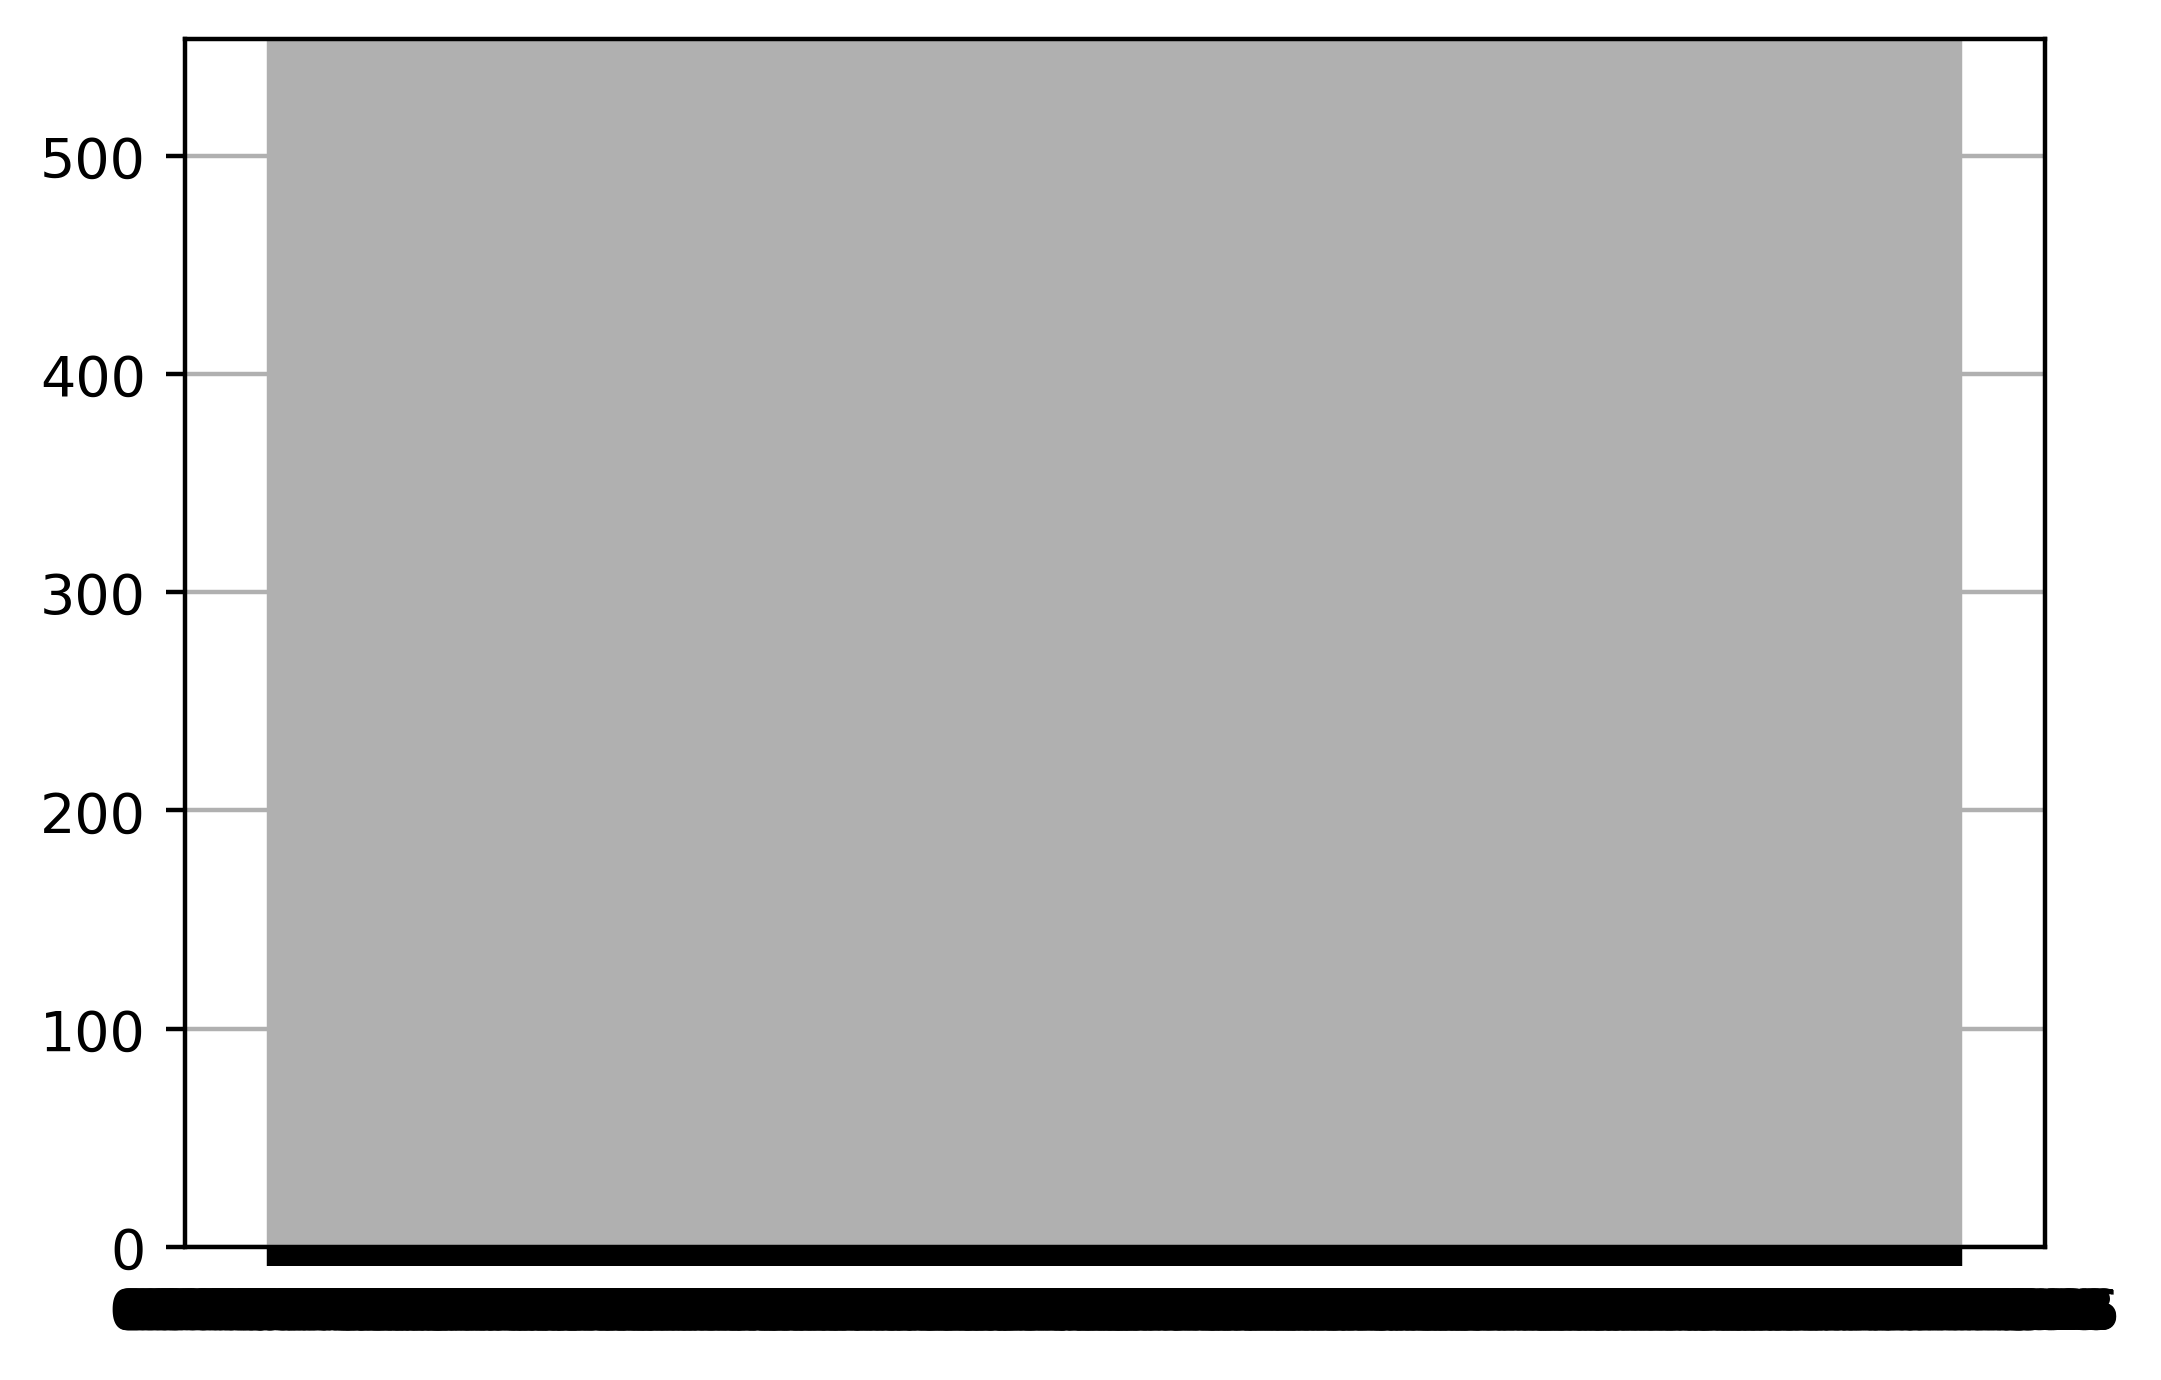

In [25]:
import matplotlib.pyplot as plt #import plotting package

#render plotting automatically
%matplotlib inline

import matplotlib as mpl #additional plotting functionality

mpl.rcParams['figure.dpi'] = 400

data['CreatedDate'].hist()

# Subreddit Statistics

In [385]:

df_r = data.groupby('Subreddit').agg('size')

#df_r.plot.bar()


#df_r.iloc[0].sort_values(ascending = False).T.plot.bar()


#countries_reviewed.sort_values(by='len', ascending=False)

df_r = df_r.reset_index()
df_r['Freq'] = df_r[df_r.columns[-1]]

df_r = df_r.drop(df_r.columns[-2], axis=1)
df_r


,Subreddit,Freq
0,AirForce,8
1,AskComputerScience,6
2,AskNetsec,159
3,AskProgramming,8
4,AskReddit,102
...,...,...
131,ucf,5
132,ufl,6
133,unt,3
134,uwaterloo,8


In [386]:
df_r = df_r.sort_values(by='Freq',ascending=False)
df_r


,Subreddit,Freq
97,hacking,221
31,HowToHack,221
87,cybersecurity,169
2,AskNetsec,159
32,ITCareerQuestions,146
...,...,...
25,HaKingNews,1
105,mcgill,1
24,FLSec,1
22,ECE,1


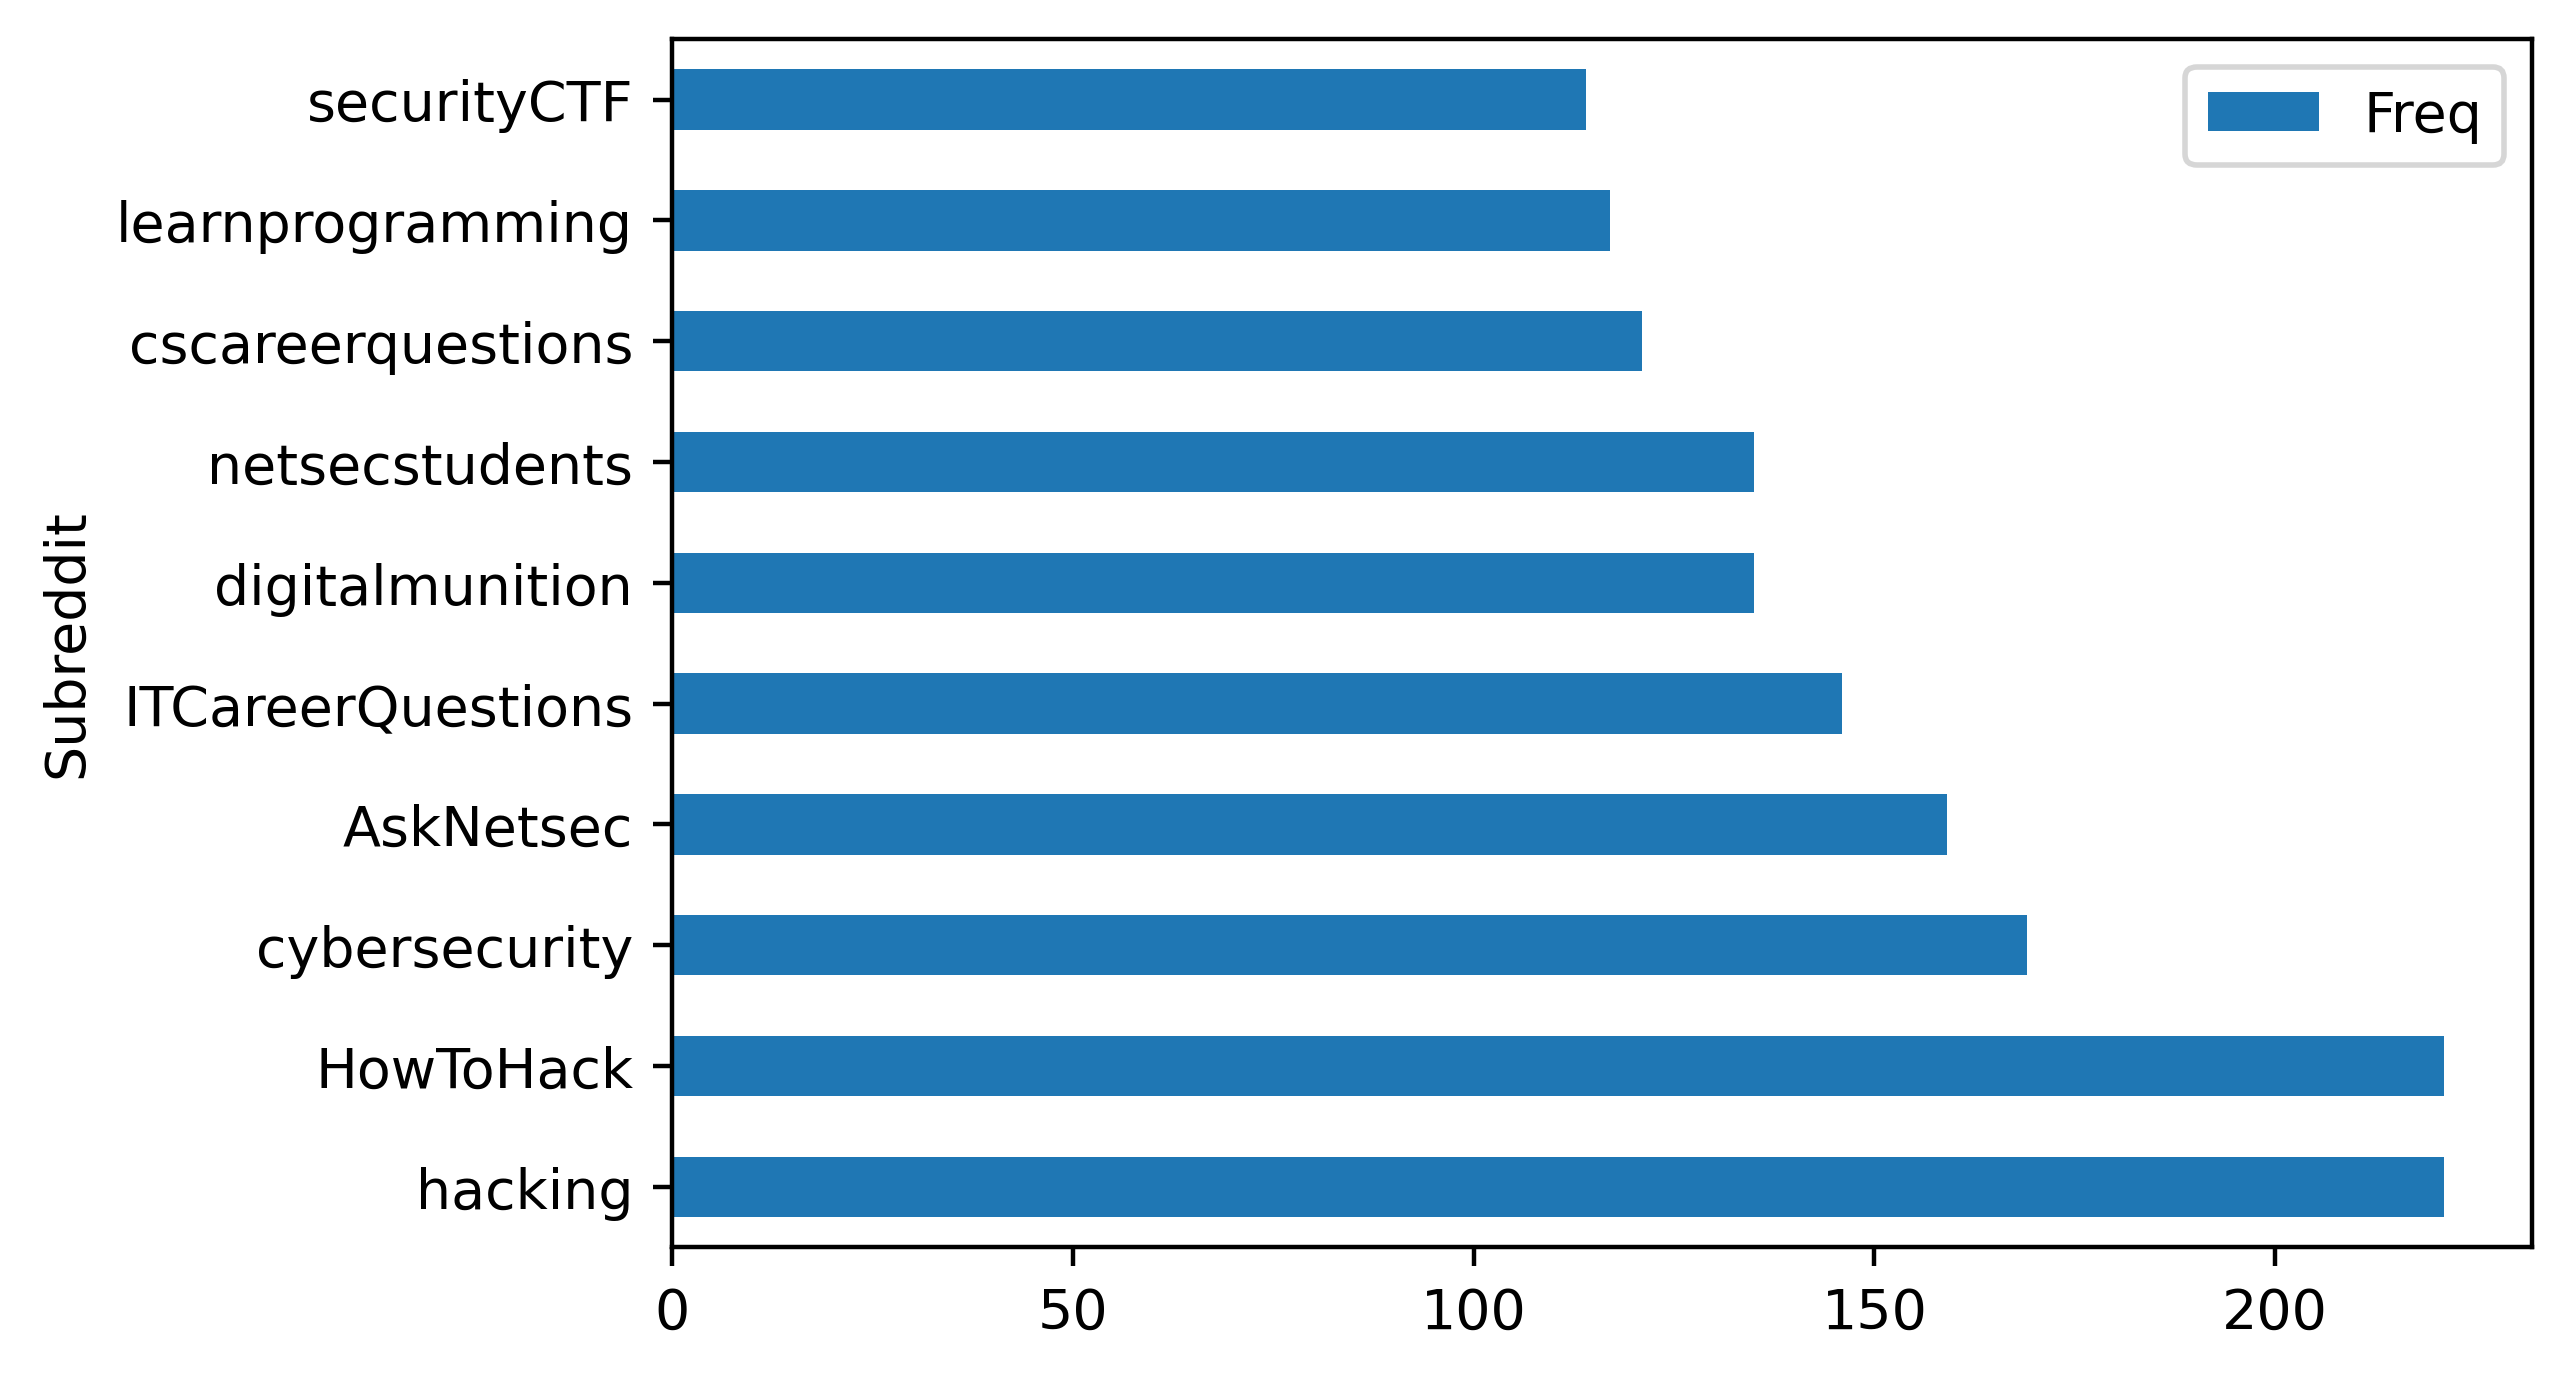

In [394]:
top10 = df_r.head(10)
#top10.plot(x='Subreddit', y='Freq', kind='barh')

ax = top10.plot.barh(x='Subreddit',y='Freq')


<ipython-input-403-03e34fe11976>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10.sort_values('Freq',inplace=True)


<AxesSubplot:ylabel='Subreddit'>

<Figure size 5600x6400 with 0 Axes>

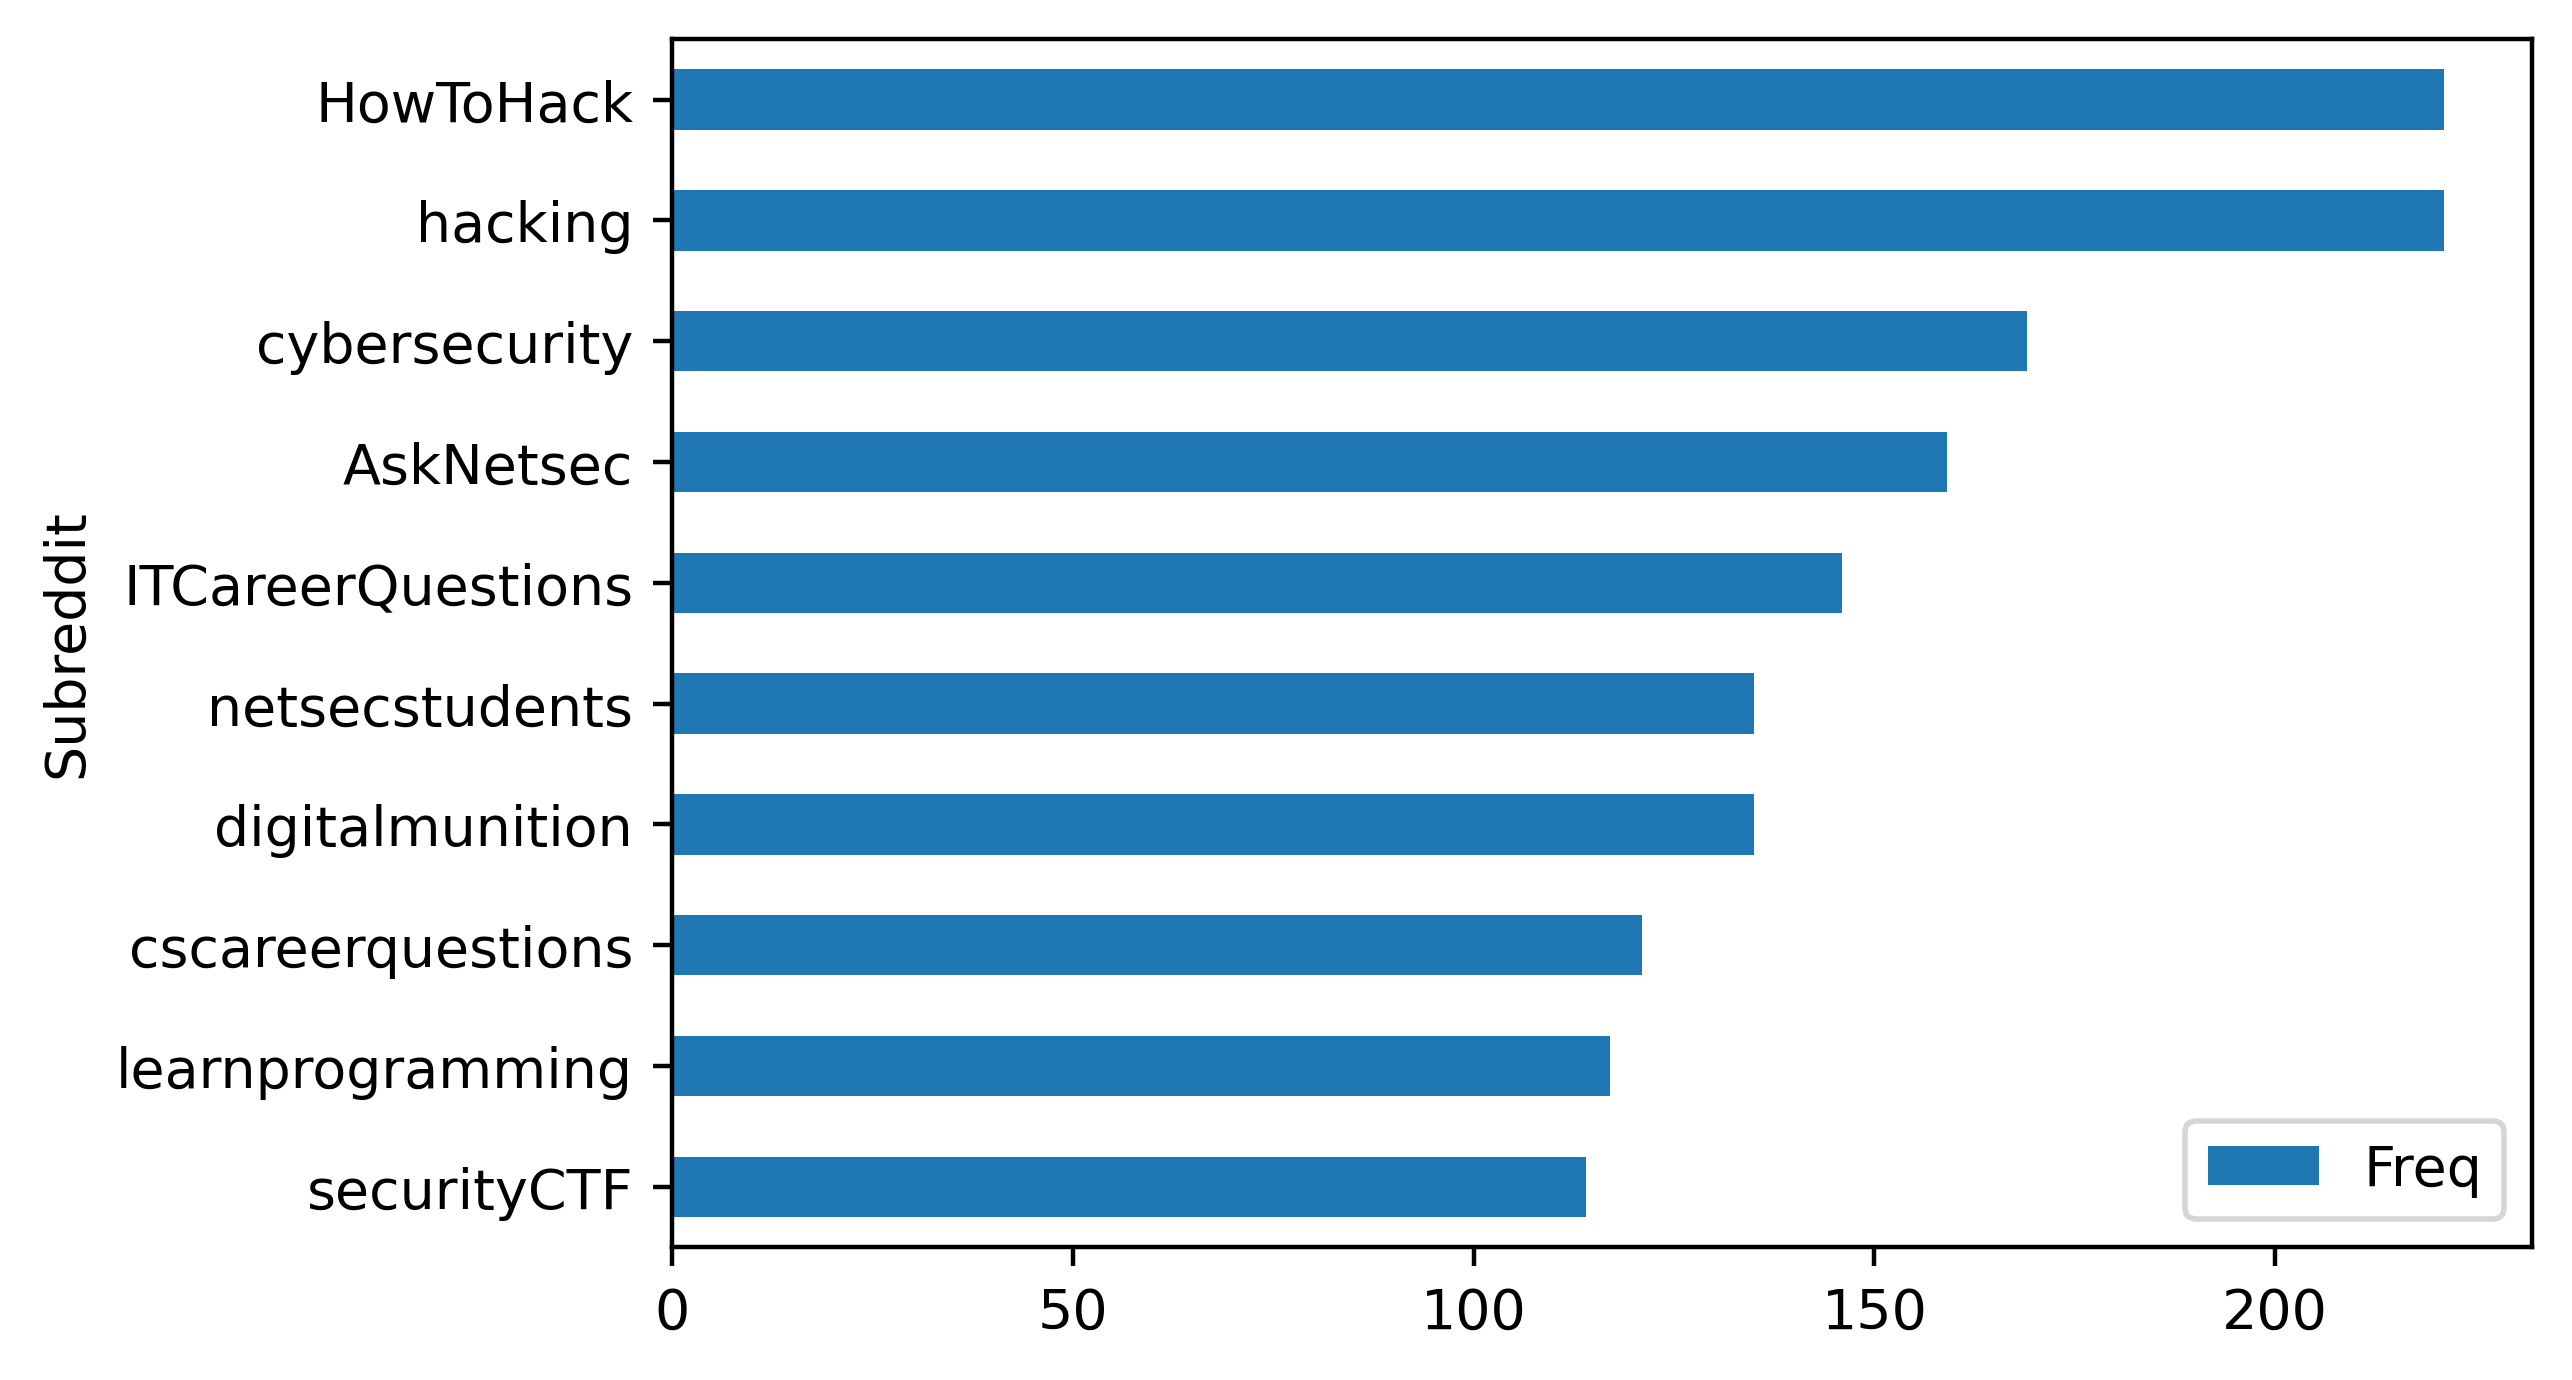

In [403]:
plt.figure(figsize=(14,16))
top10.sort_values('Freq',inplace=True)
top10.plot(kind='barh',y='Freq',x='Subreddit')

